In [1]:
%matplotlib inline

In [2]:
import csv
import numpy as np
import random

data_augment = True
import matplotlib.pyplot as plt

def train_gen():
    with open(r'/Volumes/GoogleDrive/My Drive/You Fang/deepsat/X_train_sat6.csv', 'r') as f_x, open(r'/Volumes/GoogleDrive/My Drive/You Fang/deepsat/y_train_sat6.csv', 'r') as f_y:
        read_x = csv.reader(f_x, delimiter=',')
        read_y = csv.reader(f_y, delimiter=',')
        
        debug = -1
        
        for (row_x, row_y) in zip(read_x, read_y):
            row_x = np.array(row_x, dtype=np.float32)
            row_x = row_x.reshape(28, 28, 4)
            row_y = np.array(row_y, dtype=np.float32)
            yield row_x, row_y
            
            if data_augment:
                orig_row_x = row_x
                if np.argmax(row_y) == 0:
                    if debug > -1:
                        plt.figure()
                        
                        plt.subplot(230 + debug)
                        plt.imshow(orig_row_x[:, :, :3].astype(np.uint8))
                        debug += 1
                    
                    for i in range(1, 4):
                        row_x = np.rot90(orig_row_x, k=i, axes=(0, 1))
                        yield row_x, row_y
                        
                        if debug > -1:
                            plt.subplot(230 + debug)
                            plt.imshow(row_x[:, :, :3].astype(np.uint8))
                            debug += 1
                    
                    if debug > -1:                        
                        plt.show()
                
                elif np.argmax(row_y) == 4:
                    if debug > -1:
                        plt.figure()
                        
                        plt.subplot(230 + debug)
                        plt.imshow(orig_row_x[:, :, :3].astype(np.uint8))
                        debug += 1
                    
                    for i in range(1, 4):
                        row_x = np.rot90(orig_row_x, k=i, axes=(0, 1))
                        yield row_x, row_y
                        
                        if debug > -1:
                            plt.subplot(230 + debug)
                            plt.imshow(row_x[:, :, :3].astype(np.uint8))
                            debug += 1
                    
                    row_x = np.flipud(orig_row_x)
                    yield row_x, row_y
                    
                    if debug > -1:
                        plt.subplot(230 + debug)
                        plt.imshow(row_x[:, :, :3].astype(np.uint8))
                        debug += 1
                    
                    row_x = np.fliplr(orig_row_x)
                    yield row_x, row_y
                    
                    if debug > -1:
                        plt.subplot(230 + debug)
                        plt.imshow(row_x[:, :, :3].astype(np.uint8))
                        debug += 1
                        
                        plt.show()
                    
train = train_gen()

def test_gen():
    with open(r'/Volumes/GoogleDrive/My Drive/You Fang/deepsat/X_test_sat6.csv', 'r') as f_x, open(r'/Volumes/GoogleDrive/My Drive/You Fang/deepsat/y_test_sat6.csv', 'r') as f_y:
        read_x = csv.reader(f_x, delimiter=',')
        read_y = csv.reader(f_y, delimiter=',')
        for (row_x, row_y) in zip(read_x, read_y):
            row_x = np.array(row_x, dtype=np.float32)
            row_x = row_x.reshape(28, 28, 4)
            row_y = np.array(row_y, dtype=np.float32)
            yield row_x, row_y
test = test_gen()

In [3]:
train = train_gen()
train_length = 0
for _ in train:
    train_length += 1

test = test_gen()
test_length = 0
for _ in test:
    test_length += 1

print("{} samples in training set".format(train_length))
print("{} samples in testing set".format(test_length))

409729 samples in training set
81000 samples in testing set


In [4]:
train = train_gen()
train_labels = [0, 0, 0, 0, 0, 0]
for image in train:
    label = image[1]
    label = list(map(int, label))
    train_labels = [sum(x) for x in zip(label, train_labels)]

test = test_gen()
test_labels = [0, 0, 0, 0, 0, 0]
for image in test:
    label = image[1]
    label = list(map(int, label))
    test_labels = [sum(x) for x in zip(label, test_labels)]
    
print("train_labels is {}, test_labels is {}".format(train_labels, test_labels))

train_labels is [59692, 73397, 56809, 50347, 49152, 120332], test_labels is [3714, 18367, 14185, 12596, 2070, 30068]


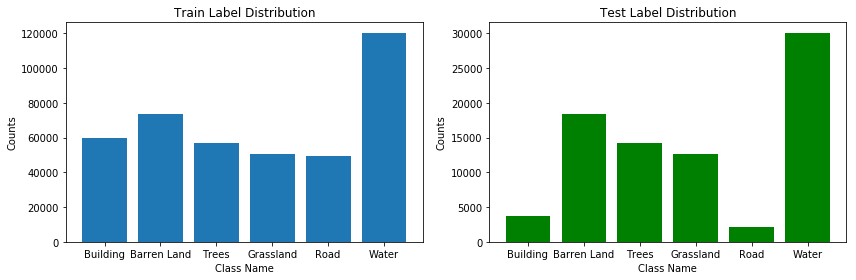

In [5]:
import matplotlib.pyplot as plt

title_str = ["Building", "Barren Land", "Trees", "Grassland", "Road", "Water"]

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.bar(np.arange(6), train_labels)
plt.title('Train Label Distribution')
plt.xticks(np.arange(6), title_str)
plt.xlabel('Class Name')
plt.ylabel('Counts')

plt.subplot(122)
plt.bar(np.arange(6), test_labels, color='g')
plt.title('Test Label Distribution')
plt.xticks(np.arange(6), title_str)
plt.xlabel('Class Name')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [6]:
train = train_gen()

images = 0
pixels = 0
total_r = 0
total_g = 0
total_b = 0
total_a = 0

for image in train:
    for row in image[0]:
        for pixel in row:
            total_r += int(pixel[0])
            total_g += int(pixel[1])
            total_b += int(pixel[2])
            total_a += int(pixel[3])
            pixels += 1
    images += 1
    if images % 10000 == 0:
        print("processed {} images".format(images))

mean_r = total_r / pixels
mean_g = total_g / pixels
mean_b = total_b / pixels
mean_a = total_a / pixels

print("pixels = {}".format(pixels))
print("total_r = {}, total_g = {}, total_b = {}, total_a = {}".format(total_r, total_g, total_b, total_a))
print("mean_r = {}, mean_g = {}, mean_b = {}, mean_a = {}".format(mean_r, mean_g, mean_b, mean_a))

processed 10000 images
processed 20000 images
processed 30000 images
processed 40000 images
processed 50000 images
processed 60000 images
processed 70000 images
processed 80000 images
processed 90000 images
processed 100000 images
processed 110000 images
processed 120000 images
processed 130000 images
processed 140000 images
processed 150000 images
processed 160000 images
processed 170000 images
processed 180000 images
processed 190000 images
processed 200000 images
processed 210000 images
processed 220000 images
processed 230000 images
processed 240000 images
processed 250000 images
processed 260000 images
processed 270000 images
processed 280000 images
processed 290000 images
processed 300000 images
processed 310000 images
processed 320000 images
processed 330000 images
processed 340000 images
processed 350000 images
processed 360000 images
processed 370000 images
processed 380000 images
processed 390000 images
processed 400000 images
pixels = 321227536
total_r = 40042614688, total_g

In [7]:
train = train_gen()

found_image = np.zeros(6)
samples = 6

plt.figure(figsize=(10, 10))

for image in train:
    idx = np.argmax(image[1])
    if found_image[idx] < samples:
        found_image[idx] += 1
        plt.subplot(6, samples, idx * samples + found_image[idx])
        if found_image[idx] == 1:
            plt.ylabel(title_str[idx])
        plt.imshow(image[0][:, :, :3].astype(np.uint8))
        plt.xticks([], [])
        plt.yticks([], [])
    if np.all(found_image == samples):
        break

plt.tight_layout()